In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import scipy
from scipy import stats

In [11]:
df_pred = pd.read_csv('/hpc/compgen/projects/gw_cfdna/snv_qs/nanopore-wgs/scripts/cyclomics_muts_predict/analyse_perread/cycl_muts_predict_t2t_perread.csv')
print(df_pred.shape)
print(list(df_pred.columns))


# each read is predicted 10X with 10 different models

(4072592, 18)
['region', 'region_readid', 'pred-readid', 'pred-readid-short', 'pred-NM', 'pred-align_length', 'pred-cigar', 'pred-score', 'model-cov', 'pred-model-only', 'pred-cov-only', 'mut1', 'mut2', 'mut3', 'mut4', 'mut5', 'NM-mut', 'cons-score-NM']


In [32]:
df_cons = pd.read_csv('/hpc/compgen/projects/gw_cfdna/snv_qs/nanopore-wgs/scripts/cyclomics_muts_predict/analyse_perread/cycl_muts_consensus_t2t_perread.csv')
# here, reads only with YM tag are in this csv
print(df_cons.shape)
print(list(df_cons.columns))
print(df_cons['region_readid'].head)

(392558, 18)
['region_readid', 'region', 'cons-readid', 'cons-readid-short', 'cons-NM', 'cons-YM', 'cons-YR', 'cons-align_length', 'cons-cigar', 'cons-score', 'model-cov', 'mut1', 'mut2', 'mut3', 'mut4', 'mut5', 'NM-mut', 'cons-score-NM']
<bound method NDFrame.head of                                        region_readid   region  \
0       region1_df1b0be5-024a-4f3b-b6fa-bc313844c261  region1   
1       region1_768737e2-4320-4722-af15-6e1ca8942b7f  region1   
2       region1_0e7882fc-ac08-40b8-be2e-e25ffa42ef8d  region1   
3       region1_2b1378de-4093-4576-8664-8edf267cf437  region1   
4       region1_20c2d7da-3f11-427d-bdff-3baeca170b6b  region1   
...                                              ...      ...   
392553  region5_3350c562-5ea8-4f8e-a5d0-f68d87f30b2d  region5   
392554  region5_5282c005-02b9-4024-8c5e-d844405291d4  region5   
392555  region5_010bc24c-cac6-453a-93eb-027003190a8f  region5   
392556  region5_0d7370ae-e88a-4d62-bfd7-2151f103fa71  region5   
392557  region5_

In [33]:
(df_cons[df_cons['region_readid'] == "region1_2b1378de-4093-4576-8664-8edf267cf437"])

,region_readid,region,cons-readid,cons-readid-short,cons-NM,cons-YM,cons-YR,cons-align_length,cons-cigar,cons-score,model-cov,mut1,mut2,mut3,mut4,mut5,NM-mut,cons-score-NM
3,region1_2b1378de-4093-4576-8664-8edf267cf437,region1,2b1378de-4093-4576-8664-8edf267cf437_I_0_chr17...,2b1378de-4093-4576-8664-8edf267cf437,2,5,F,104,5M1I17M1D81M,0.019231,Cycas Consensus,None,None,None,None,None,None,None


In [34]:
(df_pred[df_pred['region_readid'] == "region1_2b1378de-4093-4576-8664-8edf267cf437"])

,region,region_readid,pred-readid,pred-readid-short,pred-NM,pred-align_length,pred-cigar,pred-score,model-cov,pred-model-only,pred-cov-only,mut1,mut2,mut3,mut4,mut5,NM-mut,cons-score-NM
12,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,100,1S100M,0.000000,dnn_c5,dnn,c5,None,None,None,None,None,None,None
409350,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,100,1S100M,0.000000,dnn_c100,dnn,c100,None,None,None,None,None,None,None
818676,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,96,1S96M4S,0.000000,cnn_c5,cnn,c5,None,None,None,None,None,None,None
1205650,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,96,1S96M4S,0.000000,cnn_c10,cnn,c10,None,None,None,None,None,None,None
1614282,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,100,1S100M,0.000000,dnn_c15,dnn,c15,None,None,None,None,None,None,None
2023798,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,96,1S96M4S,0.000000,cnn_c15,cnn,c15,None,None,None,None,None,None,None
2433720,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,100,1S100M,0.000000,dnn_c20,dnn,c20,None,None,None,None,None,None,None
2843068,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,96,1S96M4S,0.000000,cnn_c100,cnn,c100,None,None,None,None,None,None,None
3253408,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2,96,1S96M4S,0.020833,cnn_c20,cnn,c20,None,None,None,None,None,None,None
3663266,region1,region1_2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,2b1378de-4093-4576-8664-8edf267cf437,0,100,1S100M,0.000000,dnn_c10,dnn,c10,None,None,None,None,None,None,None


In [27]:
model_cov = 'dnn_c5'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(f'subset of predictions: {df_pred_subset_select.shape}')
df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(f'subset of consensus: {df_cons_select.shape}')

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'region_readid', right_on = 'region_readid', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
print(list(df_merged.columns))
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)



SyntaxError: unmatched ')' (3412691849.py, line 1)

(311605, 18)
(313371, 18)
(365735, 36)
365735 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0004920527182241066
average score of overlapping consensus reads: 0.0010864778827573832


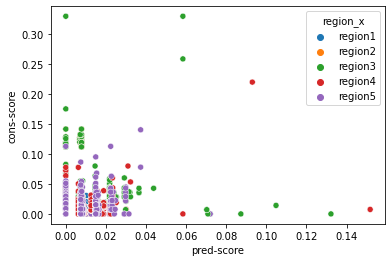

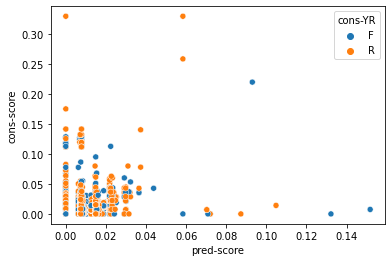

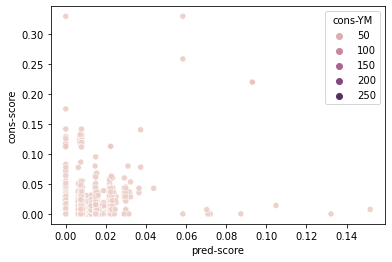

(185327, 36)
0.0004631841398950781
0.001039290297218421
(180408, 36)
0.0005217084264852913
0.001134952083819305


In [14]:
model_cov = 'dnn_c10'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)


(311603, 18)
(313369, 18)
(365729, 36)
365729 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0006014659465034904
average score of overlapping consensus reads: 0.0010842453669827176


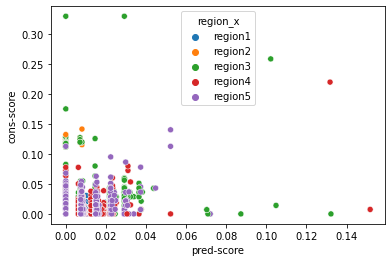

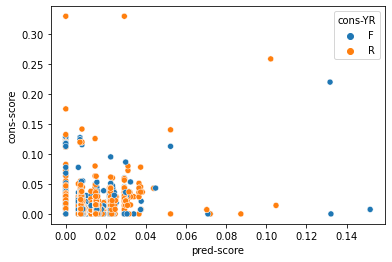

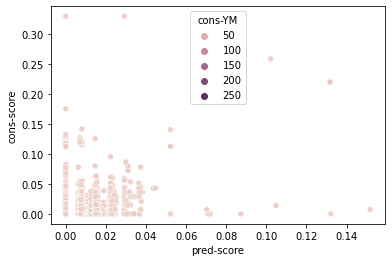

(185327, 36)
0.0005523779164123762
0.001039290297218421
(180402, 36)
0.0006518940867275227
0.0011304277164811037


In [15]:
model_cov = 'dnn_c15'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

(311605, 18)
(313371, 18)
(365735, 36)
365735 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0006903588566456375
average score of overlapping consensus reads: 0.0010864778827573832


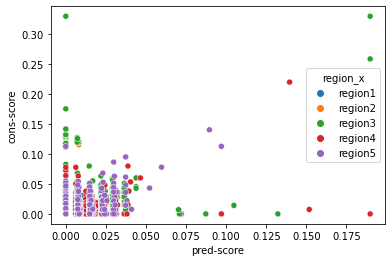

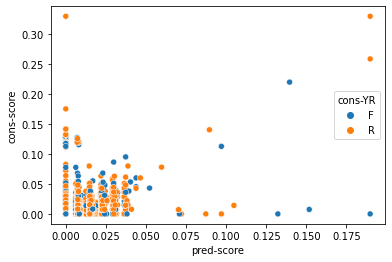

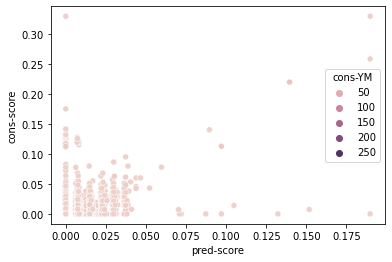

(185327, 36)
0.0006222187194872128
0.001039290297218421
(180408, 36)
0.0007603569010735976
0.001134952083819305


In [16]:
model_cov = 'dnn_c20'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

(311603, 18)
(313369, 18)
(365729, 36)
365729 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0005550479776375612
average score of overlapping consensus reads: 0.0010842453669827176


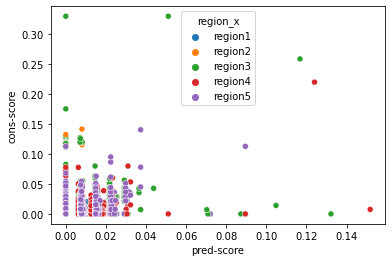

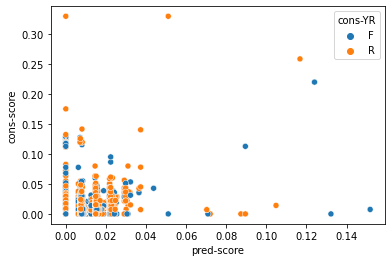

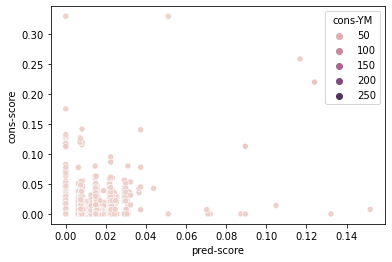

(185327, 36)
0.0005233467838158838
0.001039290297218421
(180402, 36)
0.0005876146185139928
0.0011304277164811037


In [17]:
model_cov = 'dnn_c100'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

(294862, 18)
(295861, 18)
(340240, 36)
340240 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.002661957920509663
average score of overlapping consensus reads: 0.0011308471360003162


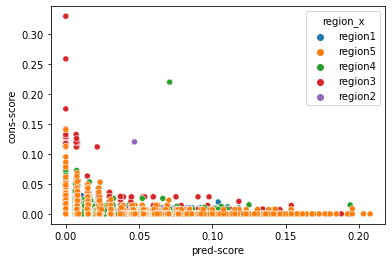

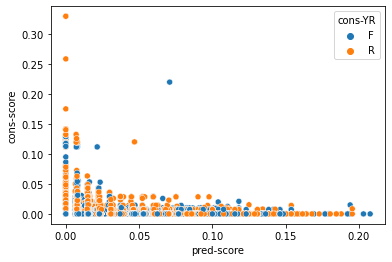

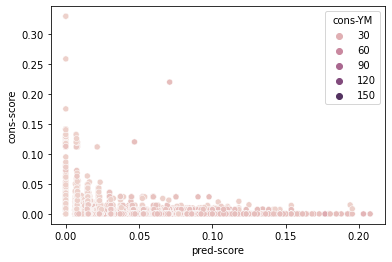

(172317, 36)
0.002717793635232355
0.0010815082287571412
(167923, 36)
0.0026046611663195244
0.0011814770823413308


In [18]:
model_cov = 'cnn_c5'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)


(312179, 18)
(313957, 18)
(366504, 36)
366504 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0017147064940507349
average score of overlapping consensus reads: 0.00108603415534947


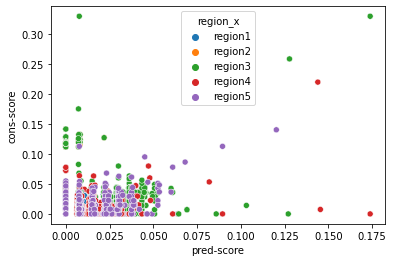

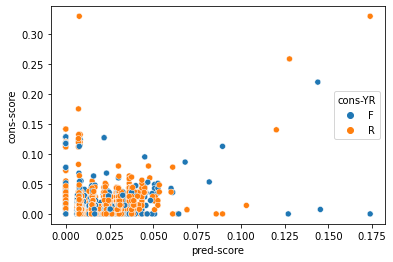

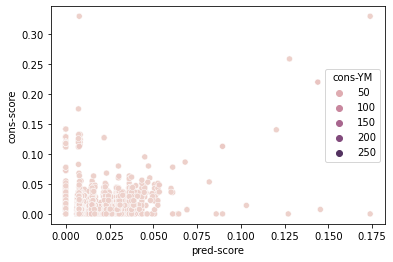

(185663, 36)
0.0016948477714989441
0.00103957411453687
(180841, 36)
0.0017350947356836218
0.0011337330209683827


In [19]:
model_cov = 'cnn_c10'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

(312153, 18)
(313931, 18)
(366472, 36)
366472 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0025350247800279843
average score of overlapping consensus reads: 0.0010856696716874117


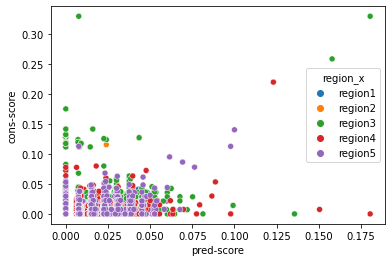

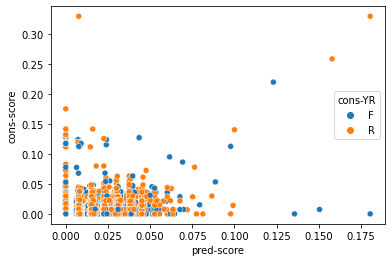

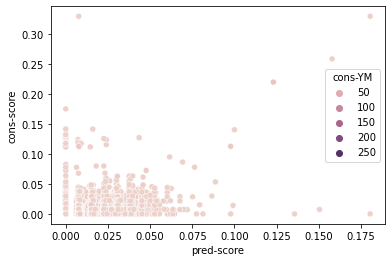

(185653, 36)
0.002436471576036484
0.0010395330748748824
(180819, 36)
0.0026362126971198495
0.0011330396804145725


In [20]:
model_cov = 'cnn_c15'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

(312188, 18)
(313966, 18)
(366521, 36)
366521 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.005103283815818387
average score of overlapping consensus reads: 0.0010862682344561132


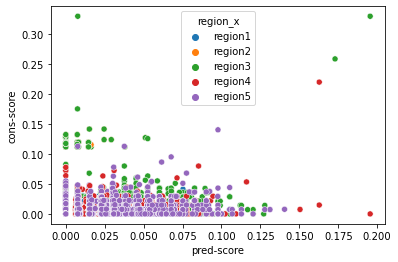

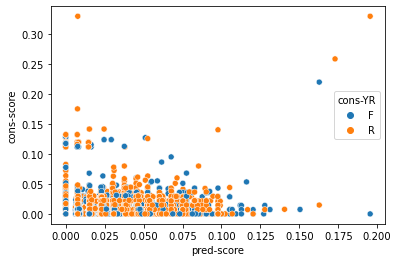

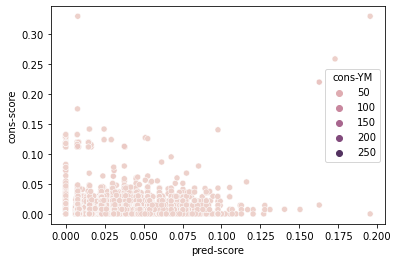

(185674, 36)
0.004649477865776796
0.0010401164003176744
(180847, 36)
0.0055692023323988295
0.0011336519104464282


In [21]:
model_cov = 'cnn_c20'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)


(312193, 18)
(313971, 18)
(366528, 36)
366528 readids that occur in both files (overlap)
average score of overlapping predicted reads: 0.0022233185145108325
average score of overlapping consensus reads: 0.0010863861737913645


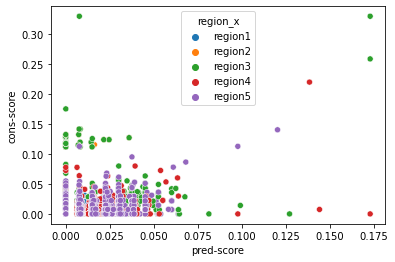

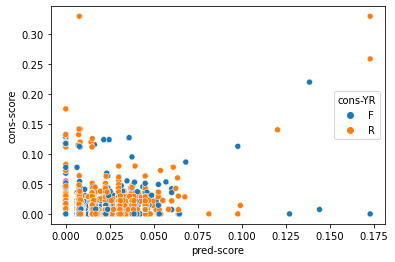

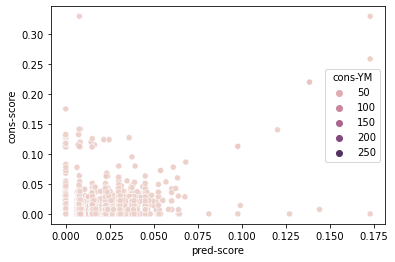

(185679, 36)
0.0021655651834134957
0.0010402049094329683
(180849, 36)
0.002282614284820994
0.0011338008179685658


In [22]:
model_cov = 'cnn_c100'

df_pred_subset = df_pred[df_pred['model-cov'] == model_cov]
pred_names = df_pred_subset['region_readid'].tolist()
cons_names = df_cons['region_readid'].tolist()

df_pred_subset_select = df_pred_subset[df_pred_subset['region_readid'].isin(cons_names)]
print(df_pred_subset_select.shape)

df_cons_select = df_cons[df_cons['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

# subset reads that are present in both datasets based on readid
df_merged = df_cons_select.merge(df_pred_subset_select, left_on = 'cons-readid-short', right_on = 'pred-readid-short', how='inner')
print(df_merged.shape)
print(f'{df_merged.shape[0]} readids that occur in both files (overlap)')
scores_pred_mean_merged = df_merged['pred-score'].mean()
scores_cons_mean_merged = df_merged['cons-score'].mean()
print(f'average score of overlapping predicted reads: {scores_pred_mean_merged}')
print(f'average score of overlapping consensus reads: {scores_cons_mean_merged}')

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='region_x')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YR')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# scatterplot of scores for overlapping readids
plt.figure(1)
sns.scatterplot(data=df_merged, x='pred-score', y='cons-score', hue='cons-YM')
# plt.ylim(0, 0.25)
# plt.xlim(0, 0.25)
plt.show()

# forward reads
df_forward = df_merged[df_merged['cons-YR'] == 'F']
print(df_forward.shape)
scores_pred_mean_merged = df_forward['pred-score'].mean()
scores_cons_mean_merged = df_forward['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)

# reverse reads
df_reverse = df_merged[df_merged['cons-YR'] == 'R']
print(df_reverse.shape)
scores_pred_mean_merged = df_reverse['pred-score'].mean()
scores_cons_mean_merged = df_reverse['cons-score'].mean()
print(scores_pred_mean_merged)
print(scores_cons_mean_merged)
